In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('song_mood_updated.csv')

In [3]:
df

,Unnamed: 0,artist,song,link,text,tags,mood
0,0,Kiss,Shock Me,/k/kiss/shock+me_20079711.html,Your lightnin's all I need \nMy satisfaction ...,"['hard rock', 'classic rock', 'rock', 'glam ro...",2
1,1,Ugly Kid Joe,Would You Like To Be There,/u/ugly+kid+joe/would+you+like+to+be+there_101...,"Somewhere the evening sun \nIs falling down, ...","['90s', 'rock', 'hard rock', 'Best song on the...",2
2,2,Allman Brothers Band,Rockin' Horse,/a/allman+brothers+band/rockin+horse_20765345....,"""My gaurdian angel wears a hard hat,"" \nSaid ...","['Southern Rock', 'classic rock', 'blues rock'...",4
3,3,Who,The Seeker,/w/who/the+seeker_20146792.html,I've looked under chairs \nI've looked under ...,"['classic rock', 'rock', '70s', 'british', 'ha...",2
4,4,Kylie Minogue,Sensitized,/k/kylie+minogue/sensitized_20662603.html,Sensitized by every word that you say \nBoy y...,"['pop', 'dance', 'sexy', 'Kylie Minogue', 'sen...",3
5,5,Alice Cooper,Not That Kind Of Love,/a/alice+cooper/not+that+kind+of+love_20286100...,"Hello, my little pretty \nMy, don't we look Y...","['hard rock', 'heavy metal', 'Alice Cooper', '...",2
6,6,Gloria Estefan,I See Your Smile,/g/gloria+estefan/i+see+your+smile_20060705.html,I get a little tongue twisted \nEvery time I ...,"['pop', 'latin', '90s', 'Love', 'easy listenin...",3
7,7,Primus,The Carpenter And The Dainty Bride,/p/primus/the+carpenter+and+the+dainty+bride_2...,"To the carpenter said the dainty bride, \nThe...","['funk metal', 'alternative', 'experimental', ...",2
8,8,Nine Inch Nails,Throw This Away,/n/nine+inch+nails/throw+this+away_20100948.html,I want you to take me \nI want you to take me...,"['industrial', 'industrial rock', 'rock', 'NIN...",2
9,9,Emmylou Harris,Calling My Children Home,/e/emmylou+harris/calling+my+children+home_200...,Those lives were mine to love and cherish \nT...,"['country', 'bluegrass', 'favorites', 'america...",0


In [3]:
X_train = df['text'].values 

y_train = df['mood'].values

In [4]:
# Porter Stemmer

import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()

def porter_tokenizer(text, stemmer=porter_stemmer):
    """
    A Porter-Stemmer-Tokenizer hybrid to splits sentences into words (tokens) 
    and applies the porter stemming algorithm to each of the obtained token. 
    Tokens that are only consisting of punctuation characters are removed as well.
    Only tokens that consist of more than one letter are being kept.
    
    Parameters
    ----------
        
    text : `str`. 
      A sentence that is to split into words.
        
    Returns
    ----------
    
    no_punct : `str`. 
      A list of tokens after stemming and removing Sentence punctuation patterns.
    
    """
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct

In [5]:
with open('english', 'r') as infile:
    stop_words = infile.read().splitlines()
print('stop words %s ...' %stop_words[:5])

stop words ['i', 'me', 'my', 'myself', 'we'] ...


In [6]:
# Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words=stop_words,
            tokenizer=porter_tokenizer,
            ngram_range=(1,1)
    )

In [10]:
len(df)

30572

In [11]:
np.floor(0.7*len(df))

21400.0

In [12]:
np.round(0.7*len(df))

21400.0

In [13]:
int(np.round(0.7*len(df)))

21400

In [15]:
df_train = df.sample(n = int(np.floor(0.7*len(df))))

In [16]:
df_train

,Unnamed: 0,artist,song,link,text,tags,mood
28629,28629,Christina Aguilera,Lift Me Up,/c/christina+aguilera/lift+me+up_20869838.html,So the pain begins \nAs the music fades \nAn...,"['pop', 'female vocalists', 'Christina Aguiler...",3
17030,17030,Talking Heads,Sugar On My Tongue,/t/talking+heads/sugar+on+my+tongue_20208576.html,"Oh, oh, Oh, oh, she's my neighbour \nFill my ...","['rock', 'alternative', '80s', 'post-punk', 'n...",2
27758,27758,Great Big Sea,Love Me Tonight,/g/great+big+sea/love+me+tonight_20752475.html,We've waited all this time \nThis long and lo...,"['folk', 'Canadian', 'rock', 'guitar', 'flute'...",2
3178,3178,Leonard Cohen,Bird On The Wire,/l/leonard+cohen/bird+on+the+wire_20082816.html,"Like a bird on the wire, \nLike a drunk in a ...","['folk', 'singer-songwriter', 'leonard cohen',...",0
25568,25568,Kirsty Maccoll,The One And Only,/k/kirsty+maccoll/the+one+only_20079579.html,Sometimes it feels like you will never win \n...,"['Kirsty MacColl', 'pop', 'rock', 'folk', 'fem...",3
20001,20001,Norah Jones,Come Away With Me,/n/norah+jones/come+away+with+me_20101709.html,Come away with me in the night \nCome away wi...,"['jazz', 'female vocalists', 'norah jones', 'b...",3
20113,20113,Josh Groban,So She Dances,/j/josh+groban/so+she+dances_20356883.html,A waltz when she walks in the room \nShe pull...,"['Josh Groban', 'romantic', 'vocal', 'piano', ...",3
13851,13851,America,All My Life,/a/america/all+my+life_20007237.html,"All my life, without a doubt I give you \nAll...","['soft rock', 'all my life', 'america', 'class...",2
1644,1644,NOFX,Straight Edge,/n/nofx/straight+edge_20101692.html,I'm a person just like you \nBut I've got bet...,"['punk rock', 'cover', 'jazz', 'punk', 'covers...",3
24819,24819,Scorpions,This Time,/s/scorpions/this+time_10212933.html,I want to know what you've got to say \nDon't...,"['hard rock', 'heavy metal', 'classic rock', '...",2


In [17]:
del df_train

In [18]:
del X_train,y_train

In [7]:
data_X = df['text'].values
data_Y = df['mood'].values

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words="english",
            tokenizer=porter_tokenizer
    )

In [9]:
data_X = tfidf.fit_transform(data_X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.4, random_state=0)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
forest_clf.predict(X_test)

array([2, 2, 2, ..., 2, 2, 2])

In [25]:
result = forest_clf.predict(X_test)

In [26]:
result

array([2, 2, 2, ..., 2, 2, 2])

In [28]:
len(result)

12229

In [29]:
clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [30]:
clf.predict(X_test)

array([1, 4, 2, ..., 2, 2, 2])

In [31]:
len(clf.predict(X_test))

12229

In [12]:
from sklearn.naive_bayes import MultinomialNB

clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
clf_NB.predict(X_test)

array([2, 2, 2, ..., 2, 2, 2])

In [13]:
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

def prediction_evaluation(model_name,model,test_X,test_Y):
    y_pred = model.predict(test_X)
    cm = metrics.confusion_matrix(test_Y, y_pred)
    plt.figure(figsize=(5,5))
    # resulting confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["sad","happy","loud","calm","unknown"], yticklabels=["sad","happy","loud","calm","unknown"])
    
    # classificatioon reprot
    print(classification_report(test_Y, y_pred, \
                            target_names = ["sad","happy","loud","calm","unknown"]))
    # accuracy reprot
    print("#### {0} accuracy = {1:5.1f}%".format(model_name,100.0 * model.score(test_X, test_Y)))
    
    plt.show()

             precision    recall  f1-score   support

        sad       0.00      0.00      0.00       348
      happy       0.00      0.00      0.00       263
       loud       0.62      1.00      0.77      7599
       calm       0.45      0.01      0.01      2570
    unknown       0.09      0.00      0.00      1449

avg / total       0.49      0.62      0.48     12229

#### MultinomialNB accuracy =  62.1%


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


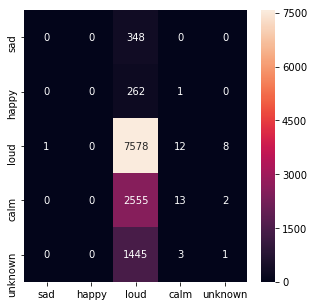

In [45]:
prediction_evaluation("MultinomialNB",clf_NB,X_test,y_test)

In [46]:
data_X

<30572x36522 sparse matrix of type '<class 'numpy.float64'>'
	with 1757175 stored elements in Compressed Sparse Row format>

In [47]:
df

,Unnamed: 0,artist,song,link,text,tags,mood
0,0,Kiss,Shock Me,/k/kiss/shock+me_20079711.html,Your lightnin's all I need \nMy satisfaction ...,"['hard rock', 'classic rock', 'rock', 'glam ro...",2
1,1,Ugly Kid Joe,Would You Like To Be There,/u/ugly+kid+joe/would+you+like+to+be+there_101...,"Somewhere the evening sun \nIs falling down, ...","['90s', 'rock', 'hard rock', 'Best song on the...",2
2,2,Allman Brothers Band,Rockin' Horse,/a/allman+brothers+band/rockin+horse_20765345....,"""My gaurdian angel wears a hard hat,"" \nSaid ...","['Southern Rock', 'classic rock', 'blues rock'...",4
3,3,Who,The Seeker,/w/who/the+seeker_20146792.html,I've looked under chairs \nI've looked under ...,"['classic rock', 'rock', '70s', 'british', 'ha...",2
4,4,Kylie Minogue,Sensitized,/k/kylie+minogue/sensitized_20662603.html,Sensitized by every word that you say \nBoy y...,"['pop', 'dance', 'sexy', 'Kylie Minogue', 'sen...",3
5,5,Alice Cooper,Not That Kind Of Love,/a/alice+cooper/not+that+kind+of+love_20286100...,"Hello, my little pretty \nMy, don't we look Y...","['hard rock', 'heavy metal', 'Alice Cooper', '...",2
6,6,Gloria Estefan,I See Your Smile,/g/gloria+estefan/i+see+your+smile_20060705.html,I get a little tongue twisted \nEvery time I ...,"['pop', 'latin', '90s', 'Love', 'easy listenin...",3
7,7,Primus,The Carpenter And The Dainty Bride,/p/primus/the+carpenter+and+the+dainty+bride_2...,"To the carpenter said the dainty bride, \nThe...","['funk metal', 'alternative', 'experimental', ...",2
8,8,Nine Inch Nails,Throw This Away,/n/nine+inch+nails/throw+this+away_20100948.html,I want you to take me \nI want you to take me...,"['industrial', 'industrial rock', 'rock', 'NIN...",2
9,9,Emmylou Harris,Calling My Children Home,/e/emmylou+harris/calling+my+children+home_200...,Those lives were mine to love and cherish \nT...,"['country', 'bluegrass', 'favorites', 'america...",0


In [48]:
loud_rows = df.loc[df['mood'] == 2]

In [49]:
loud_rows

,Unnamed: 0,artist,song,link,text,tags,mood
0,0,Kiss,Shock Me,/k/kiss/shock+me_20079711.html,Your lightnin's all I need \nMy satisfaction ...,"['hard rock', 'classic rock', 'rock', 'glam ro...",2
1,1,Ugly Kid Joe,Would You Like To Be There,/u/ugly+kid+joe/would+you+like+to+be+there_101...,"Somewhere the evening sun \nIs falling down, ...","['90s', 'rock', 'hard rock', 'Best song on the...",2
3,3,Who,The Seeker,/w/who/the+seeker_20146792.html,I've looked under chairs \nI've looked under ...,"['classic rock', 'rock', '70s', 'british', 'ha...",2
5,5,Alice Cooper,Not That Kind Of Love,/a/alice+cooper/not+that+kind+of+love_20286100...,"Hello, my little pretty \nMy, don't we look Y...","['hard rock', 'heavy metal', 'Alice Cooper', '...",2
7,7,Primus,The Carpenter And The Dainty Bride,/p/primus/the+carpenter+and+the+dainty+bride_2...,"To the carpenter said the dainty bride, \nThe...","['funk metal', 'alternative', 'experimental', ...",2
8,8,Nine Inch Nails,Throw This Away,/n/nine+inch+nails/throw+this+away_20100948.html,I want you to take me \nI want you to take me...,"['industrial', 'industrial rock', 'rock', 'NIN...",2
10,10,Journey,If He Should Break Your Heart,/j/journey/if+he+should+break+your+heart_20075...,Please be wrong \nPlease don't tell me it's r...,"['classic rock', 'rock', 'heard on Pandora', '...",2
12,12,Ween,Demon Sweat,/w/ween/demon+sweat_20145560.html,The sky dripped in a demon sweat the night she...,"['rock', 'alternative rock', 'Ween', 'metal', ...",2
13,13,W.A.S.P.,Let It Roar,/w/wasp/let+it+roar_20247178.html,OH GET UP on your feet \nIt's all ya got \nI...,"['heavy metal', 'WASP', 'hard rock', 'hair met...",2
14,14,Santana,Night Hunting Time,/s/santana/night+hunting+time_20121593.html,Drunk all the whiskey \nBut I still can't get...,"['rock', 'Latin Rock', 'santana', 'classic roc...",2


In [50]:
sad_rows = df.loc[df['mood'] == 0]
happy_rows = df.loc[df['mood'] == 1]
loud_rows = df.loc[df['mood'] == 2]
calm_rows = df.loc[df['mood'] == 3]
unknown_rows = df.loc[df['mood'] == 4]

In [51]:
len(sad_rows)

879

In [52]:
len(happy_rows)

678

In [53]:
len(loud_rows)

18969

In [54]:
len(calm_rows)

6390

             precision    recall  f1-score   support

        sad       0.15      0.01      0.03       348
      happy       0.50      0.25      0.33       263
       loud       0.69      0.88      0.77      7599
       calm       0.44      0.34      0.39      2570
    unknown       0.19      0.04      0.07      1449

avg / total       0.56      0.63      0.58     12229

#### LinearSVC accuracy =  63.1%


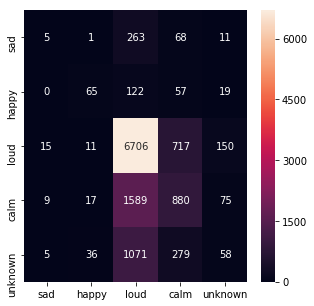

In [55]:
prediction_evaluation("LinearSVC",clf,X_test,y_test)

In [14]:
test = df.drop(df.query('mood == 2').sample(frac=.964).index)

In [68]:
test

,Unnamed: 0,artist,song,link,text,tags,mood
2,2,Allman Brothers Band,Rockin' Horse,/a/allman+brothers+band/rockin+horse_20765345....,"""My gaurdian angel wears a hard hat,"" \nSaid ...","['Southern Rock', 'classic rock', 'blues rock'...",4
4,4,Kylie Minogue,Sensitized,/k/kylie+minogue/sensitized_20662603.html,Sensitized by every word that you say \nBoy y...,"['pop', 'dance', 'sexy', 'Kylie Minogue', 'sen...",3
6,6,Gloria Estefan,I See Your Smile,/g/gloria+estefan/i+see+your+smile_20060705.html,I get a little tongue twisted \nEvery time I ...,"['pop', 'latin', '90s', 'Love', 'easy listenin...",3
8,8,Nine Inch Nails,Throw This Away,/n/nine+inch+nails/throw+this+away_20100948.html,I want you to take me \nI want you to take me...,"['industrial', 'industrial rock', 'rock', 'NIN...",2
9,9,Emmylou Harris,Calling My Children Home,/e/emmylou+harris/calling+my+children+home_200...,Those lives were mine to love and cherish \nT...,"['country', 'bluegrass', 'favorites', 'america...",0
11,11,Kenny Chesney,What I Need To Do,/k/kenny+chesney/what+i+need+to+do_20077650.html,I keep tellin' myself this is the right thing ...,"['country', 'Kenny Chesney', 'What I Need To D...",0
15,15,John Denver,It Makes Me Giggle,/j/john+denver/it+makes+me+giggle_20073829.html,It makes me giggle \nIt makes me giggle \nJu...,"['country', 'folk', 'Happy song']",3
18,18,John Prine,Illegal Smile,/j/john+prine/illegal+smile_20074742.html,"When I woke up this morning, things were looki...","['country', 'folk', 'singer-songwriter', 'favo...",3
19,19,Isley Brothers,Caravan Of Love,/i/isley+brothers/caravan+of+love_20177217.html,Ooh...ooh...ooh.. \nOoh...ooh...ooh.. \n \n...,"['soul', 'the isley brothers', 'rhythm and blu...",3
20,20,Utada Hikaru,Automatic,/u/utada+hikaru/automatic_10162373.html,I can't help but feel alive....... \nYeah... ...,"['j-pop', 'japanese', 'utada hikaru', 'JPop', ...",4


In [15]:
sad_rows = test.loc[df['mood'] == 0]
happy_rows = test.loc[df['mood'] == 1]
loud_rows = test.loc[df['mood'] == 2]
calm_rows = test.loc[df['mood'] == 3]
unknown_rows = test.loc[df['mood'] == 4]

In [70]:
len(loud_rows)

683

In [16]:
test2 = test.drop(df.query('mood == 0').sample(frac=.22).index)

In [17]:
sad_rows = test2.loc[df['mood'] == 0]

In [18]:
len(sad_rows)

686

In [19]:
test3 = test2.drop(df.query('mood == 3').sample(frac=.894).index)

In [20]:
calm_rows = test3.loc[df['mood'] == 3]

In [21]:
len(calm_rows)

677

In [22]:
test4 = test3.drop(df.query('mood == 4').sample(frac=.815).index)

In [23]:
unknown_rows = test4.loc[df['mood'] == 4]

In [24]:
len(unknown_rows)

676

In [25]:
test4

,Unnamed: 0,artist,song,link,text,tags,mood
9,9,Emmylou Harris,Calling My Children Home,/e/emmylou+harris/calling+my+children+home_200...,Those lives were mine to love and cherish \nT...,"['country', 'bluegrass', 'favorites', 'america...",0
11,11,Kenny Chesney,What I Need To Do,/k/kenny+chesney/what+i+need+to+do_20077650.html,I keep tellin' myself this is the right thing ...,"['country', 'Kenny Chesney', 'What I Need To D...",0
19,19,Isley Brothers,Caravan Of Love,/i/isley+brothers/caravan+of+love_20177217.html,Ooh...ooh...ooh.. \nOoh...ooh...ooh.. \n \n...,"['soul', 'the isley brothers', 'rhythm and blu...",3
25,25,Michael Bolton,Joy To The World,/m/michael+bolton/joy+to+the+world_20092459.html,Joy to the world \nThe Lord has come \nLet e...,"['christmas', 'xmas', 'holiday', 'Christmas ta...",1
49,49,James Taylor,Never Die Young,/j/james+taylor/never+die+young_20069231.html,We were ring-around-the-rosy children \nThey ...,"['james taylor', 'folk', 'singer-songwriter', ...",4
63,63,Uriah Heep,Feels Like,/u/uriah+heep/feels+like_20142460.html,I can feel your sadness \nFrom what I said to...,"['hard rock', 'classic rock', 'Progressive roc...",2
81,81,Cheap Trick,Can't Stop Fallin' Into Love,/c/cheap+trick/cant+stop+fallin+into+love_2002...,"\nHey, little ladies, there's some cool youn...","['rock', 'classic rock', 'power pop', 'pop', '...",4
88,88,One Direction,Story Of My Life,/o/one+direction/story+of+my+life_21070023.html,[Harry:] \nWritten in these walls \nAre the ...,"['pop', 'story of my life', 'one direction', '...",3
104,104,George Harrison,"Bye Bye, Love",/g/george+harrison/bye+bye+love_20059077.html,Bye bye love \nBye bye happiness \nHello lon...,"['george harrison', 'classic rock', '70s', 'br...",2
105,105,Procol Harum,Memorial Drive,/p/procol+harum/memorial+drive_20111513.html,"Cellar full of diamonds, turret full of gold ...","['Progressive rock', 'classic rock', 'rock', '...",2


In [26]:
len(sad_rows)
len(happy_rows)
len(loud_rows)
len(calm_rows)
len(unknown_rows)

676

In [27]:
len(sad_rows)

686

In [28]:
len(happy_rows)

678

In [29]:
len(loud_rows)

683

In [30]:
len(calm_rows)

677

In [31]:
len(unknown_rows)

676

In [32]:
df_updated = test4

In [33]:
df_updated

,Unnamed: 0,artist,song,link,text,tags,mood
9,9,Emmylou Harris,Calling My Children Home,/e/emmylou+harris/calling+my+children+home_200...,Those lives were mine to love and cherish \nT...,"['country', 'bluegrass', 'favorites', 'america...",0
11,11,Kenny Chesney,What I Need To Do,/k/kenny+chesney/what+i+need+to+do_20077650.html,I keep tellin' myself this is the right thing ...,"['country', 'Kenny Chesney', 'What I Need To D...",0
19,19,Isley Brothers,Caravan Of Love,/i/isley+brothers/caravan+of+love_20177217.html,Ooh...ooh...ooh.. \nOoh...ooh...ooh.. \n \n...,"['soul', 'the isley brothers', 'rhythm and blu...",3
25,25,Michael Bolton,Joy To The World,/m/michael+bolton/joy+to+the+world_20092459.html,Joy to the world \nThe Lord has come \nLet e...,"['christmas', 'xmas', 'holiday', 'Christmas ta...",1
49,49,James Taylor,Never Die Young,/j/james+taylor/never+die+young_20069231.html,We were ring-around-the-rosy children \nThey ...,"['james taylor', 'folk', 'singer-songwriter', ...",4
63,63,Uriah Heep,Feels Like,/u/uriah+heep/feels+like_20142460.html,I can feel your sadness \nFrom what I said to...,"['hard rock', 'classic rock', 'Progressive roc...",2
81,81,Cheap Trick,Can't Stop Fallin' Into Love,/c/cheap+trick/cant+stop+fallin+into+love_2002...,"\nHey, little ladies, there's some cool youn...","['rock', 'classic rock', 'power pop', 'pop', '...",4
88,88,One Direction,Story Of My Life,/o/one+direction/story+of+my+life_21070023.html,[Harry:] \nWritten in these walls \nAre the ...,"['pop', 'story of my life', 'one direction', '...",3
104,104,George Harrison,"Bye Bye, Love",/g/george+harrison/bye+bye+love_20059077.html,Bye bye love \nBye bye happiness \nHello lon...,"['george harrison', 'classic rock', '70s', 'br...",2
105,105,Procol Harum,Memorial Drive,/p/procol+harum/memorial+drive_20111513.html,"Cellar full of diamonds, turret full of gold ...","['Progressive rock', 'classic rock', 'rock', '...",2


In [34]:
X_train = df_updated['text'].values 

y_train = df_updated['mood'].values

In [35]:
data_X = df_updated['text'].values
data_Y = df_updated['mood'].values

In [36]:
data_X = tfidf.fit_transform(data_X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=0)

In [37]:
from sklearn.svm import LinearSVC

linear_clf = LinearSVC(random_state=0, tol=1e-5)
linear_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
from sklearn.naive_bayes import MultinomialNB

clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
linear_clf.predict(X_test)

array([0, 4, 2, ..., 4, 4, 2])

In [41]:
forest_clf.predict(X_test)

array([3, 3, 2, ..., 2, 0, 2])

In [42]:
clf_NB.predict(X_test)

array([0, 0, 0, ..., 0, 0, 2])

             precision    recall  f1-score   support

        sad       0.36      0.41      0.39       205
      happy       0.54      0.42      0.47       221
       loud       0.34      0.41      0.37       201
       calm       0.32      0.31      0.31       196
    unknown       0.24      0.22      0.23       197

avg / total       0.36      0.36      0.36      1020

#### LinearSVC accuracy =  35.8%


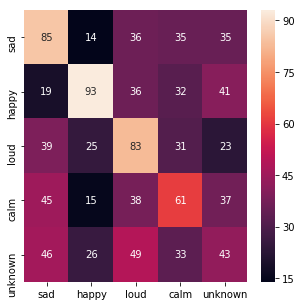

In [43]:
prediction_evaluation("LinearSVC",linear_clf,X_test,y_test)

             precision    recall  f1-score   support

        sad       0.29      0.29      0.29       205
      happy       0.70      0.28      0.40       221
       loud       0.27      0.53      0.36       201
       calm       0.30      0.40      0.35       196
    unknown       0.17      0.07      0.10       197

avg / total       0.36      0.31      0.30      1020

#### RandomForest accuracy =  31.3%


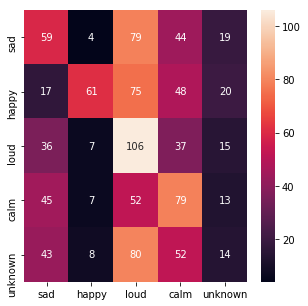

In [44]:
prediction_evaluation("RandomForest",forest_clf,X_test,y_test)

             precision    recall  f1-score   support

        sad       0.28      0.75      0.41       204
      happy       0.65      0.39      0.49       190
       loud       0.45      0.22      0.29       202
       calm       0.30      0.23      0.26       210
    unknown       0.24      0.12      0.16       214

avg / total       0.38      0.34      0.32      1020

#### MultinomialNB accuracy =  33.7%


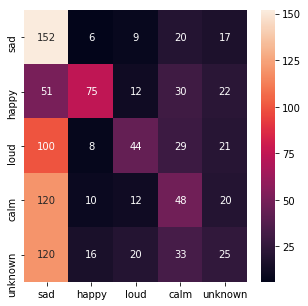

In [175]:
prediction_evaluation("MultinomialNB",clf_NB,X_test,y_test)